In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

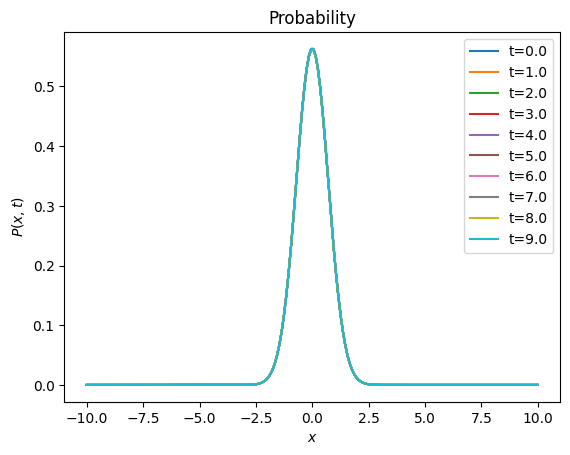

In [10]:
#----------------- Exercise 3.a -----------------#
#setting up box and intervals
L = 10  #box size
dx = 0.1  #space step
dt =  0.0001 #time step. given the stability condition (V_max = 50 and dx=0.1) this is a safe choice for stability
size_arr = int(2*L/dx)
x = np.linspace(-10, L, size_arr)

def psi(x): #initial condition function (harmonic oscillator eigenfunction for n=0)
    psi = np.zeros_like(x)
    for i in range(size_arr):
        psi[i] = (1/np.pi)**(0.25) * np.exp(-x[i]**2/2)
    return psi

R_0 = psi(x) #creating our vector with function info

def laplacian(f, dx): #creating a function for central difference laplacian of some function (array)
    nabla_sqr = np.zeros_like(f)
    for j in range(0, size_arr-1):
        nabla_sqr[j] = (f[j+1] - 2*f[j] + f[j-1])/(dx**2)
    return nabla_sqr



def dynamics(R, I, dt): #function that gives a time step following the recurrence relation given by the exercise
   l_i = laplacian(I, dx)
   l_r = laplacian(R, dx)
   R_evolved = R + dt * (0.5*x**2)*I - dt*0.5*l_i
   I_evolved = I - dt * (0.5*x**2)*R + dt*(0.5)*l_r
   return R_evolved, I_evolved


#giving that first half-step in order to initialize the algorithm. notice that we let R and I "out of phase" by half a step in this part, so we dont need to worry about that afterwards
#take notice I(t=0) is 0 (just inspecting the given intial function)
I_half = np.zeros_like(R_0)
I_half = -0.5*dt*(-0.5*laplacian(R_0, dx) + 0.5*x**2*R_0)
R = np.empty(size_arr)
R = R_0
I = np.empty(size_arr)
I = I_half


#here you just pick how many seconds (being aware of time step order of magnitude!)
#in case it is necessary to increase the time step order, it is important to remember the global error grows LINEARLY with HOW MANY STEPS but is quadratic with dt
#(as commented is Vischer reference)
time_steps=130000
R_dynamics= []
I_dynamics= []


#executing time step function with the chosen number of steps and saving it to an array. we later save it to a numpy array so further manipulations are more efficient.
for t in range (time_steps):
    R, I = dynamics(R, I, dt)
    R_dynamics.append(R.copy())
    I_dynamics.append(I.copy())
R_dynamics = np.array(R_dynamics)
I_dynamics = np.array(I_dynamics)

#now, with everything in hands, we just need to plot the probability distribution
probability = np.empty((time_steps, size_arr))
for i in range(time_steps-1):
    probability[i]  = R_dynamics[i]**2 + I_dynamics[i+1]*I_dynamics[i-1]
for i in range (0, 10):
    plt.plot(x, probability[10000*i], label=f't={10000*i*dt}')

plt.legend()
plt.title('Probability')
plt.ylabel('$P(x,t)$')
plt.xlabel('$x$')
plt.show()

# This beheavior heappens because the eigenfunction is normalized, so the operation preserves the norm, and therefore the norm is conserved.

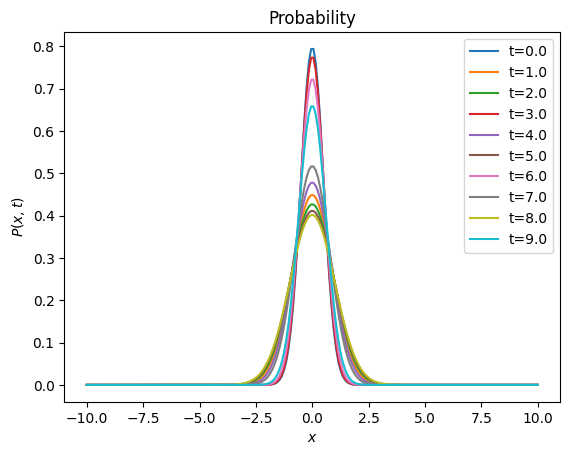

In [11]:
#----------------- Exercise 3.b -----------------#

#again, problem setup
L = 10
dx = 0.1
dt =  0.0001
size_arr = int(2*L/dx)
x = np.linspace(-10, L, size_arr)

#defining same functions as item A)

def psi(x): #initial condition function (harmonic oscillator eigenfunction for n=0)
    psi = np.zeros_like(x)
    for i in range(size_arr):
        #psi[i] = (1/np.pi)**(0.25) * np.exp(-x[i]**2/2)
        psi[i] = (2/np.pi)**(0.25) * np.exp(-x[i]**2)
    return psi
R_0 = psi(x) #creating our vector with function info

def laplacian(f, dx):
    nabla_sqr = np.zeros_like(f)
    for j in range(0, size_arr-1):
        nabla_sqr[j] = (f[j+1] - 2*f[j] + f[j-1])/(dx**2)
    return nabla_sqr

def dynamics(R, I, dt):
   l_i = laplacian(I, dx)
   l_r = laplacian(R, dx)
   R_evolved = R + dt * (0.5*x**2)*I - dt*0.5*l_i
   I_evolved = I - dt * (0.5*x**2)*R + dt*(0.5)*l_r
   return R_evolved, I_evolved

#again, half-stepping around!
I_half = np.zeros_like(R_0)
I_half = -0.5*dt*(-0.5*laplacian(R_0, dx) + 0.5*x**2*R_0)
R = np.empty(size_arr)
R = R_0
I = np.empty(size_arr)
I = I_half
time_steps=130000
R_dynamics= []
I_dynamics= []

#and God said, let there be dynamics
for t in range (time_steps):
    R, I = dynamics(R, I, dt)
    R_dynamics.append(R.copy())
    I_dynamics.append(I.copy())
R_dynamics = np.array(R_dynamics)
I_dynamics = np.array(I_dynamics)

#now, with everything in hands, we just need to plot the probability distribution
probability = np.empty((time_steps, size_arr))
for i in range(time_steps-1):
    probability[i]  = R_dynamics[i]**2 + I_dynamics[i+1]*I_dynamics[i-1]
for i in range (0, 10):
    plt.plot(x, probability[10000*i], label=f't={10000*i*dt}')


plt.legend()
plt.title('Probability')
plt.ylabel('$P(x,t)$')
plt.xlabel('$x$')
plt.show()

# Since the function is not normalized, the probability will vary over time.

In [12]:
#----------------- Exercise 3.c -----------------#

#same old story but...
L = 10
dx = 0.1
dt =  0.0001
size_arr = int(2*L/dx)
x = np.linspace(-10, L, size_arr)
#now we add the interaction term U0
U0 = -2


#define the functions we use...
def psi(x):
    psi = np.zeros_like(x)
    for i in range(size_arr):
        psi[i] = 1/(np.sqrt(2))*1/(np.cosh(x[i]))
    return psi
R_0 = psi(x)

def laplacian(f, dx):
    nabla_sqr = np.zeros_like(f)
    for j in range(0, size_arr-1):
        nabla_sqr[j] = (f[j+1] - 2*f[j] + f[j-1])/np.power(dx, 2)
    return nabla_sqr

def dynamics(R, I, dt): #and we add that alteration to the recurrence that gives us the dynamic, setting V=0.
   l_i = laplacian(I, dx)
   l_r = laplacian(R, dx)
   R_evolved = (R - dt*0.5*l_i + dt * U0 * np.power(I, 3))/(1-dt*U0*R*I)
   I_evolved = (I - dt*(0.5)*l_r - dt * U0 * np.power(R, 3))/(1+dt*U0*I*R)
   return R_evolved, I_evolved

I_half = np.zeros_like(R_0)
I_half = -0.5*dt*(-0.5*laplacian(R_0, dx) -  U0*np.power(R_0, 3))
R = np.empty(size_arr)
R = R_0
I = np.empty(size_arr)
I = I_half
time_steps=1000
R_dynamics= []
I_dynamics= []

# Time evolution
for t in range (time_steps):
    R, I = dynamics(R, I, dt)
    R_dynamics.append(R.copy())
    I_dynamics.append(I.copy())

R_dynamics = np.array(R_dynamics)
I_dynamics = np.array(I_dynamics)


#now, with everything in hands, we just need to plot the probability distribution
probability = np.empty((time_steps, size_arr))
for i in range(time_steps-1):
    probability[i]  = R_dynamics[i]**2 + I_dynamics[i+1]*I_dynamics[i-1]
for i in range (0, 10):
    plt.plot(x, probability[100*i], label=f't={100*i*dt}')

plt.legend()
plt.title('Probability')
plt.ylabel('$P(x,t)$')
plt.xlabel('$x$')
plt.show()
